<a href="https://colab.research.google.com/github/Sidra-hub796/ML-toxic-comments/blob/Sidra/Copy_of_NLP_Project_different_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd

# here Load the datasets
train_data = pd.read_csv('/content/train (1).csv')
test_data = pd.read_csv('/content/test.csv')
##sample_submission = pd.read_csv('/content/sample_submission.csv')

# Display the first few rows of the train and test datasets
train_data_head = train_data.head()
test_data_head = test_data.head()
train_data_info = train_data.info()


# Check for missing values
print("\nMissing Values:")
print(train_data.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB

Missing Values:
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


<ipython-input-100-fc786193c313>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_distribution.index, y=label_distribution.values, palette="viridis")


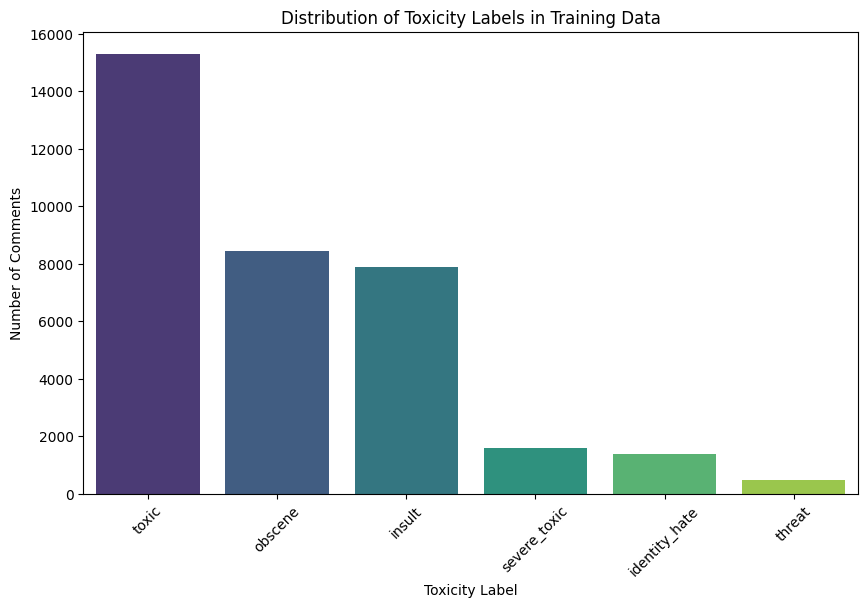

,0
toxic,15294
obscene,8449
insult,7877
severe_toxic,1595
identity_hate,1405
threat,478


In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of the toxicity labels in the training data
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
label_distribution = train_data[labels].sum().sort_values(ascending=False)

# Plot the distribution of toxicity labels
plt.figure(figsize=(10, 6))
sns.barplot(x=label_distribution.index, y=label_distribution.values, palette="viridis")
plt.title('Distribution of Toxicity Labels in Training Data')
plt.ylabel('Number of Comments')
plt.xlabel('Toxicity Label')
plt.xticks(rotation=45)
plt.show()

label_distribution


In [101]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define text cleaning function
def clean_text(text):
    # Lowercase conversion
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+", "", text)
    # Remove special characters
    text = re.sub(r"[^\w\s]", "", text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Remove duplicate tokens
    tokens = list(dict.fromkeys(tokens))
    return ' '.join(tokens)

# Apply cleaning
train_data['cleaned_comment'] = train_data['comment_text'].apply(clean_text)

# Verify cleaned text
print("Cleaned Text Sample:")
print(train_data[['comment_text', 'cleaned_comment']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Cleaned Text Sample:
                                        comment_text  \
0  Explanation\nWhy the edits made under my usern...   
1  D'aww! He matches this background colour I'm s...   
2  Hey man, I'm really not trying to edit war. It...   
3  "\nMore\nI can't make any real suggestions on ...   
4  You, sir, are my hero. Any chance you remember...   

                                     cleaned_comment  
0  explanation edits made username hardcore metal...  
1  daww match background colour im seemingly stuc...  
2  hey man im really trying edit war guy constant...  
3  cant make real suggestion improvement wondered...  
4                sir hero chance remember page thats  


In [102]:
import re
import string

# Example preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = ' '.join([word for word in text.split() if len(word) > 2])  # Remove short words
    return text

# Load  dataset (adjust this for the file)
# Assuming the dataset has been loaded as train_data (use actual file path)
# train_data = pd.read_csv('train.csv')  # Adjust to  dataset path

# Apply preprocessing to the 'comment_text' column
train_data['comment_text'] = train_data['comment_text'].apply(preprocess_text)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data['comment_text'], train_data[labels], test_size=0.2, random_state=42)

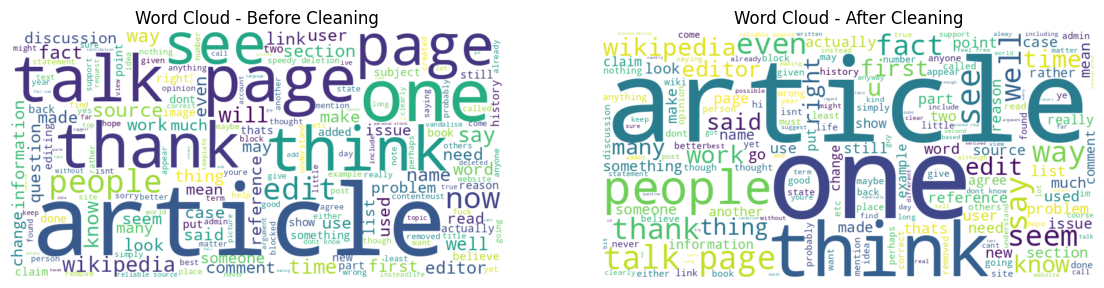

In [103]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word Cloud for Original Data (Before Cleaning)
wordcloud_original = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_data['comment_text']))

# Word Cloud for Cleaned Data (After Cleaning)
wordcloud_cleaned = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_data['cleaned_comment']))

# Plotting the word clouds
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_original, interpolation='bilinear')
plt.title("Word Cloud - Before Cleaning")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_cleaned, interpolation='bilinear')
plt.title("Word Cloud - After Cleaning")
plt.axis("off")

plt.show()




[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


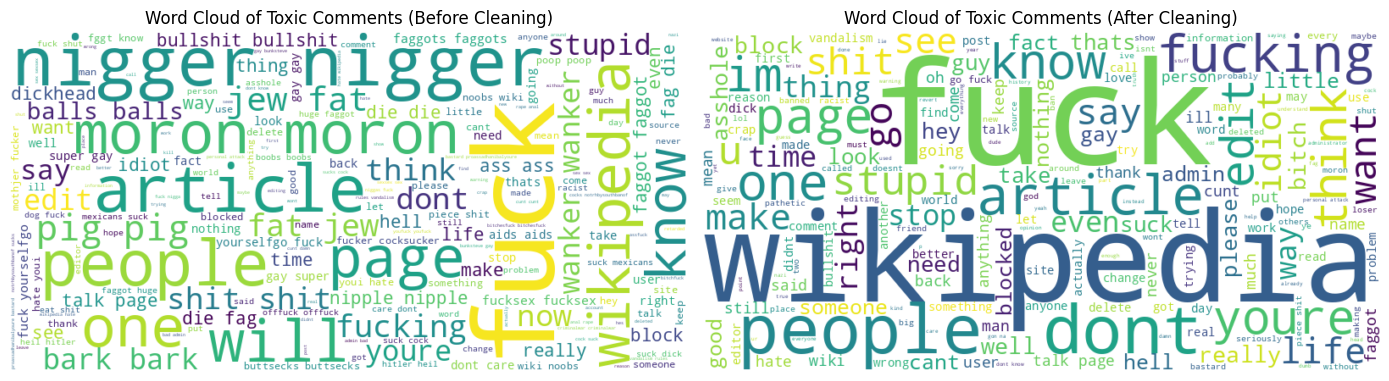

In [104]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
nltk.download('punkt_tab')
# Load  dataset
##data = pd.read_csv('train.csv')  # replace with  actual dataset path

# Assuming the 'toxic' column indicates whether a comment is toxic or not
toxic_data = train_data[train_data['toxic'] == 1]  # Filter toxic comments

# proceed with the original code
toxic_text_before = ' '.join(toxic_data['comment_text'])

# Combine all toxic comments before cleaning
toxic_text_before = ' '.join(toxic_data['comment_text'])

# Generate Word Cloud for Toxic Comments (Before Cleaning)
wordcloud_before = WordCloud(width=800, height=400, background_color='white').generate(toxic_text_before)

# Combine all toxic comments after cleaning
toxic_text_after = ' '.join(toxic_data['cleaned_comment'])

# Generate Word Cloud for Toxic Comments (After Cleaning)
wordcloud_after = WordCloud(width=800, height=400, background_color='white').generate(toxic_text_after)

# Plotting the Word Clouds
plt.figure(figsize=(14, 6))

# Before cleaning
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_before, interpolation='bilinear')
plt.title("Word Cloud of Toxic Comments (Before Cleaning)")
plt.axis('off')

# After cleaning
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_after, interpolation='bilinear')
plt.title("Word Cloud of Toxic Comments (After Cleaning)")
plt.axis('off')

plt.tight_layout()
plt.show()


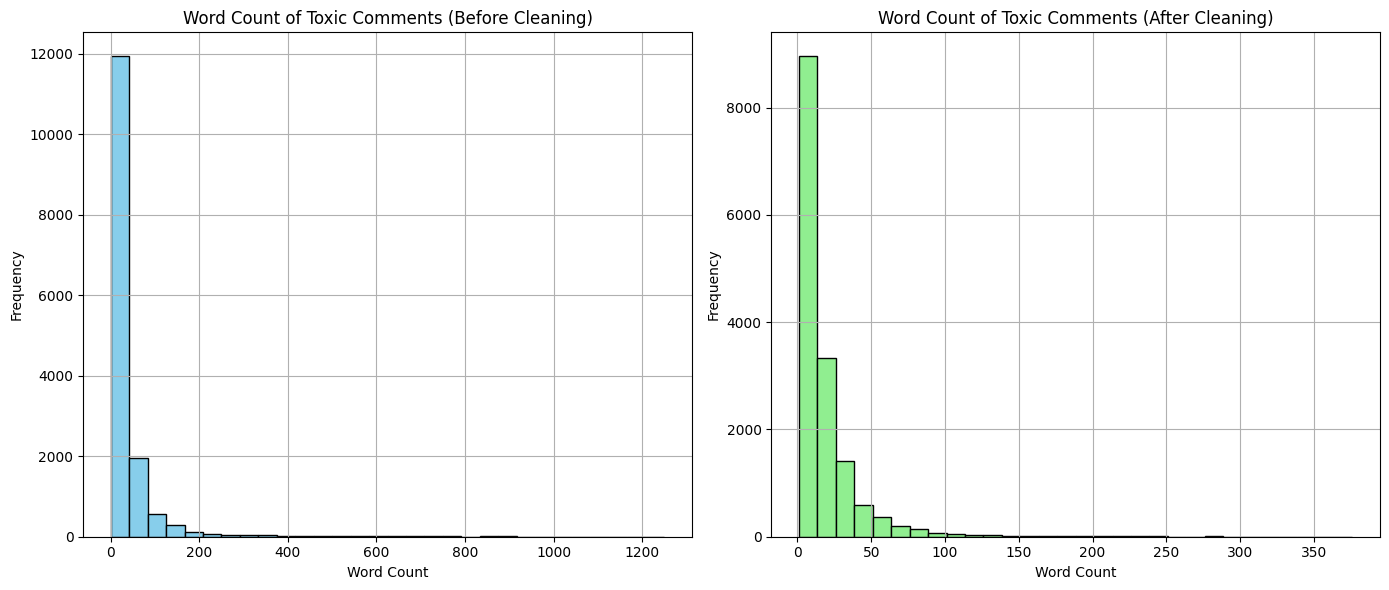

In [105]:
# Filter toxic comments
toxic_data = train_data[train_data['toxic'] == 1].copy()  # Create a copy of the DataFrame to avoid modifying the original

# Word count before cleaning (toxic comments)
toxic_data.loc[:, 'original_word_count'] = toxic_data['comment_text'].apply(lambda x: len(x.split()))

# Word count after cleaning (toxic comments)
toxic_data.loc[:, 'cleaned_word_count'] = toxic_data['cleaned_comment'].apply(lambda x: len(x.split()))

# Plotting the word count before and after cleaning for toxic comments
plt.figure(figsize=(14, 6))

# Before cleaning
plt.subplot(1, 2, 1)
toxic_data['original_word_count'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("Word Count of Toxic Comments (Before Cleaning)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")

# After cleaning
plt.subplot(1, 2, 2)
toxic_data['cleaned_word_count'].hist(bins=30, color='lightgreen', edgecolor='black')
plt.title("Word Count of Toxic Comments (After Cleaning)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()



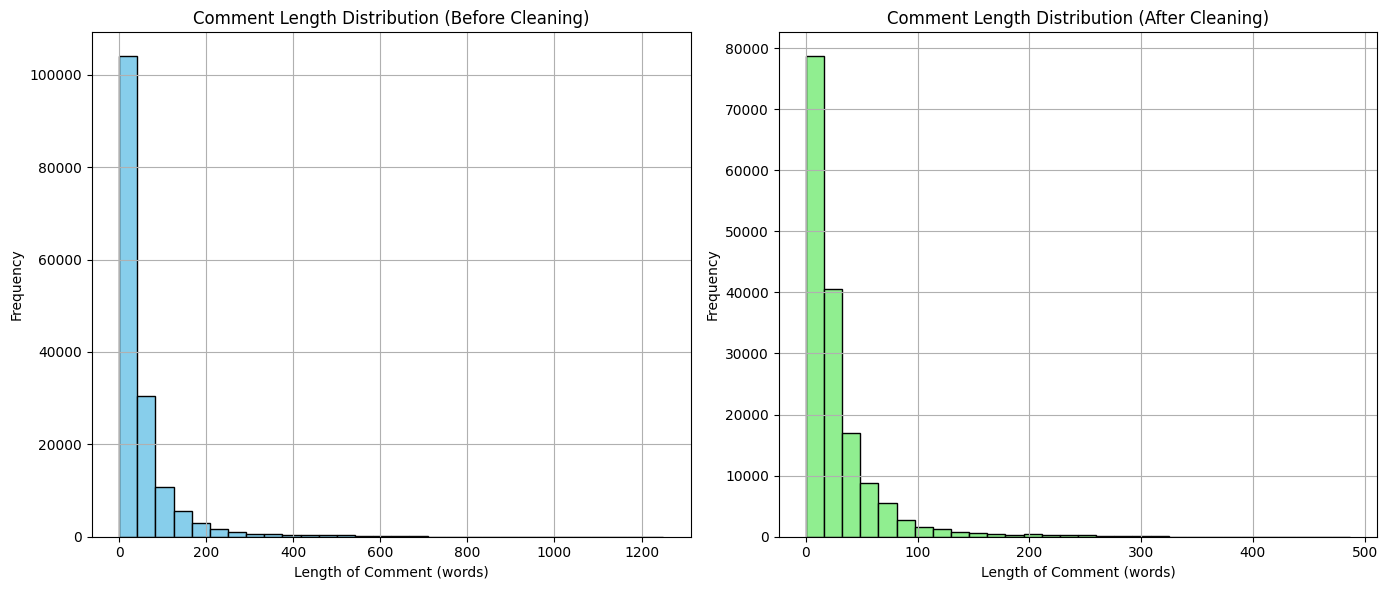

In [106]:
# Calculate comment lengths (number of words)
train_data['comment_length'] = train_data['comment_text'].apply(lambda x: len(x.split()))
train_data['cleaned_comment_length'] = train_data['cleaned_comment'].apply(lambda x: len(x.split()))

# Plotting comment length distribution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
train_data['comment_length'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("Comment Length Distribution (Before Cleaning)")
plt.xlabel("Length of Comment (words)")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
train_data['cleaned_comment_length'].hist(bins=30, color='lightgreen', edgecolor='black')
plt.title("Comment Length Distribution (After Cleaning)")
plt.xlabel("Length of Comment (words)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


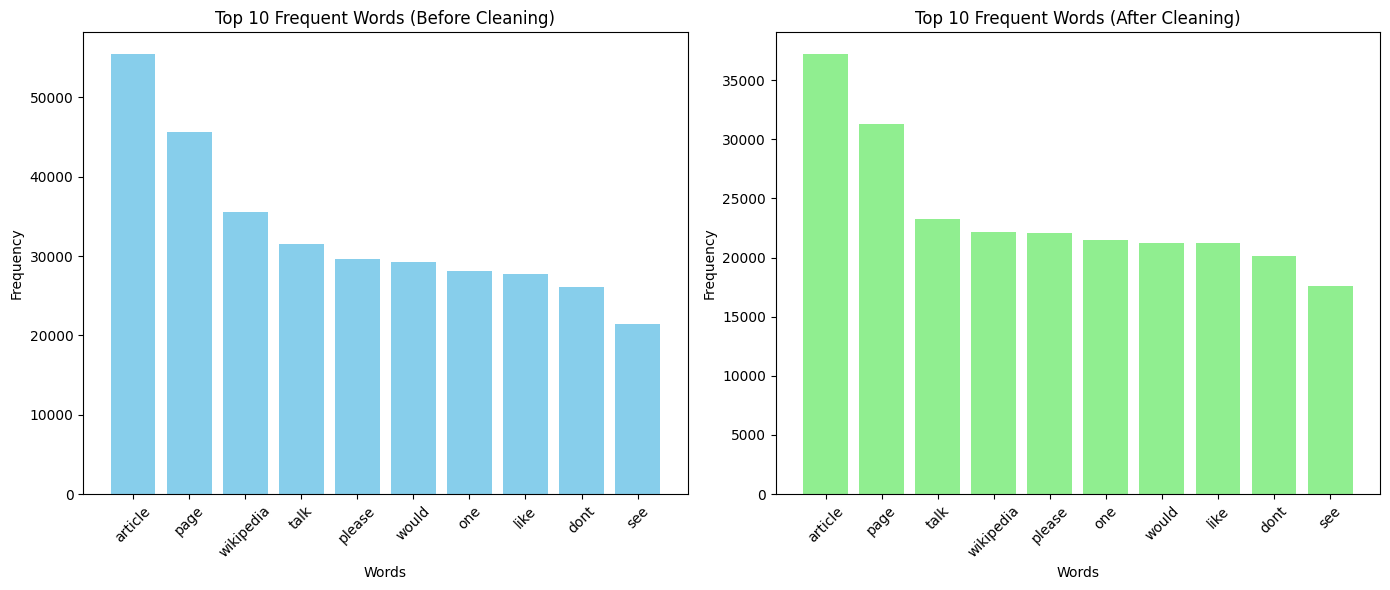

In [107]:
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Remove stopwords from the original data
stop_words = set(stopwords.words('english'))

# Get top 10 most frequent words in original data
original_words = ' '.join(train_data['comment_text']).split()
original_words = [word for word in original_words if word not in stop_words]
original_word_freq = Counter(original_words).most_common(10)

# Get top 10 most frequent words in cleaned data
cleaned_words = ' '.join(train_data['cleaned_comment']).split()
cleaned_words = [word for word in cleaned_words if word not in stop_words]
cleaned_word_freq = Counter(cleaned_words).most_common(10)

# Plotting the frequency of top 10 words before and after cleaning
plt.figure(figsize=(14, 6))

# Original Data (Before Cleaning)
plt.subplot(1, 2, 1)
words, counts = zip(*original_word_freq)
plt.bar(words, counts, color='skyblue')
plt.title("Top 10 Frequent Words (Before Cleaning)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

# Cleaned Data (After Cleaning)
plt.subplot(1, 2, 2)
words, counts = zip(*cleaned_word_freq)
plt.bar(words, counts, color='lightgreen')
plt.title("Top 10 Frequent Words (After Cleaning)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MultiLabelBinarizer


# Define the preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = ' '.join([word for word in text.split() if len(word) > 2])  # Remove short words
    return text

# Apply text cleaning to training data
train_data['cleaned_comment_text'] = train_data['comment_text'].apply(preprocess_text)
# Apply text cleaning to training data
#train_data['cleaned_comment_text'] = clean_text(train_data['comment_text'])

# Split the training data into train and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(
    train_data['cleaned_comment_text'],
    train_data[labels],
    test_size=0.2,
    random_state=42
)

# Vectorize the text using TF-IDF
tfidf = TfidfVectorizer(max_features=10000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

# Initialize a Naive Bayes classifier
nb_classifier = MultinomialNB()

# Fit the model on the training data (for each toxicity label separately)
predictions = {}
for label in labels:
    nb_classifier.fit(X_train_tfidf, y_train[label])
    y_val_pred = nb_classifier.predict(X_val_tfidf)
    predictions[label] = y_val_pred

    # Print classification report for each label
    print(f"Classification Report for {label}:")
    print(classification_report(y_val[label], y_val_pred))

# Now let's check the overall accuracy and macro F1-score
accuracy = {label: accuracy_score(y_val[label], predictions[label]) for label in labels}
accuracy


Classification Report for toxic:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     28859
           1       0.93      0.51      0.66      3056

    accuracy                           0.95     31915
   macro avg       0.94      0.75      0.82     31915
weighted avg       0.95      0.95      0.94     31915

Classification Report for severe_toxic:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31594
           1       0.70      0.10      0.17       321

    accuracy                           0.99     31915
   macro avg       0.85      0.55      0.58     31915
weighted avg       0.99      0.99      0.99     31915

Classification Report for obscene:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     30200
           1       0.91      0.50      0.65      1715

    accuracy                           0.97     31915
   macro avg       0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98     30301
           1       0.83      0.41      0.55      1614

    accuracy                           0.97     31915
   macro avg       0.90      0.70      0.76     31915
weighted avg       0.96      0.97      0.96     31915

Classification Report for identity_hate:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31621
           1       0.69      0.04      0.07       294

    accuracy                           0.99     31915
   macro avg       0.84      0.52      0.53     31915
weighted avg       0.99      0.99      0.99     31915



{'toxic': 0.9495221682594391,
 'severe_toxic': 0.9905060316465611,
 'obscene': 0.9706407645307848,
 'threat': 0.9976813410621964,
 'insult': 0.9657841140529532,
 'identity_hate': 0.9909760300798998}

In [109]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to handle class imbalance
X_train_tfidf_smote = X_train_tfidf.copy()

# Applying SMOTE for each label separately
smote = SMOTE(random_state=42)
X_train_smote = {}
y_train_smote = {}

# For each label, apply SMOTE and oversample the minority class
for label in labels:
    X_train_smote[label], y_train_smote[label] = smote.fit_resample(X_train_tfidf_smote, y_train[label])

# Train a Naive Bayes classifier on the SMOTE-oversampled dataset
predictions_smote = {}
for label in labels:
    nb_classifier.fit(X_train_smote[label], y_train_smote[label])
    y_val_pred_smote = nb_classifier.predict(X_val_tfidf)
    predictions_smote[label] = y_val_pred_smote

    # Print classification report for each label
    print(f"Classification Report for {label} (with SMOTE):")
    print(classification_report(y_val[label], y_val_pred_smote))

# Overall accuracy after handling imbalance
accuracy_smote = {label: accuracy_score(y_val[label], predictions_smote[label]) for label in labels}
accuracy_smote


Classification Report for toxic (with SMOTE):
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     28859
           1       0.50      0.86      0.63      3056

    accuracy                           0.90     31915
   macro avg       0.74      0.88      0.79     31915
weighted avg       0.94      0.90      0.91     31915

Classification Report for severe_toxic (with SMOTE):
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     31594
           1       0.14      0.88      0.25       321

    accuracy                           0.95     31915
   macro avg       0.57      0.91      0.61     31915
weighted avg       0.99      0.95      0.96     31915

Classification Report for obscene (with SMOTE):
              precision    recall  f1-score   support

           0       0.99      0.92      0.96     30200
           1       0.39      0.87      0.54      1715

    accuracy                       

{'toxic': 0.902835657214476,
 'severe_toxic': 0.9462321792260693,
 'obscene': 0.9199122669591101,
 'threat': 0.9508694971016763,
 'insult': 0.9168416105279649,
 'identity_hate': 0.9259909133636222}

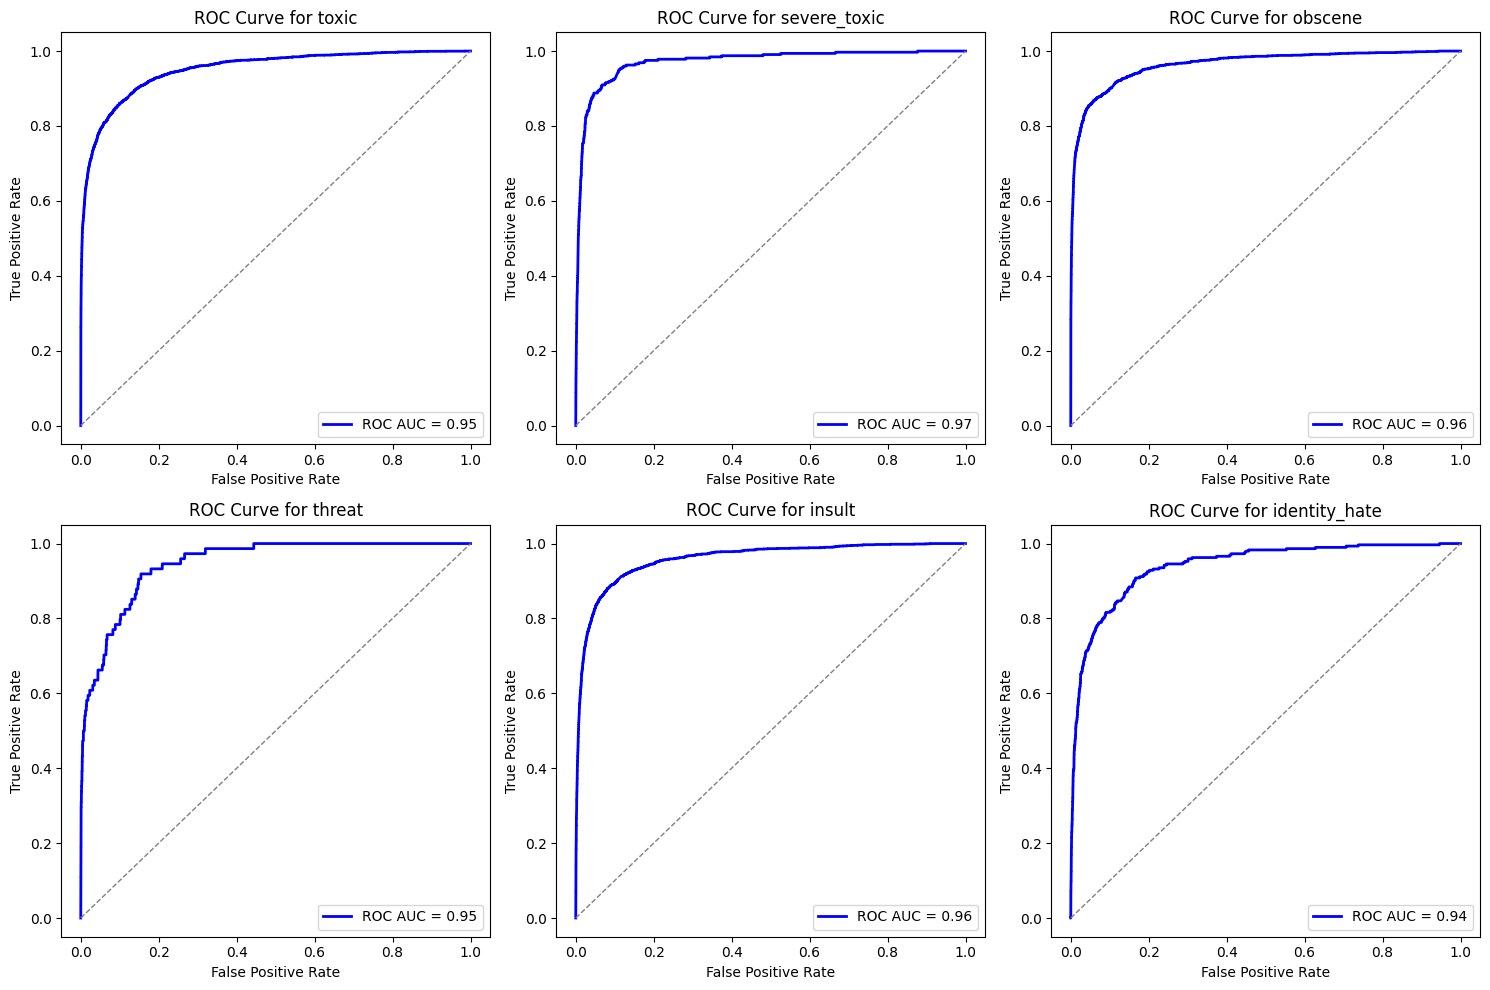

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'train_data' is loaded with 'comment_text' and the labels (toxic, severe_toxic, etc.)
# Apply preprocessing to 'comment_text' column
train_data['comment_text'] = train_data['comment_text'].apply(preprocess_text)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data['comment_text'], train_data[labels], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Initialize a dictionary to store ROC AUC results for each label
fpr = {}
tpr = {}
roc_auc = {}

# Train and evaluate a separate model for each label
for label in labels:
    # Train a binary classifier for each label
    nb_model.fit(X_train_tfidf, y_train[label])

    # Get predicted probabilities for each class
    predictions_proba = nb_model.predict_proba(X_val_tfidf)[:, 1]  # For binary classification (class 1)

    # Calculate ROC curve and AUC for each label
    fpr[label], tpr[label], _ = roc_curve(y_val[label], predictions_proba)
    roc_auc[label] = auc(fpr[label], tpr[label])

# Plot ROC curves for all labels
plt.figure(figsize=(15, 10))
for i, label in enumerate(labels):
    plt.subplot(2, 3, i+1)
    plt.plot(fpr[label], tpr[label], color='b', lw=2, label=f'ROC AUC = {roc_auc[label]:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey', lw=1)
    plt.title(f'ROC Curve for {label}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


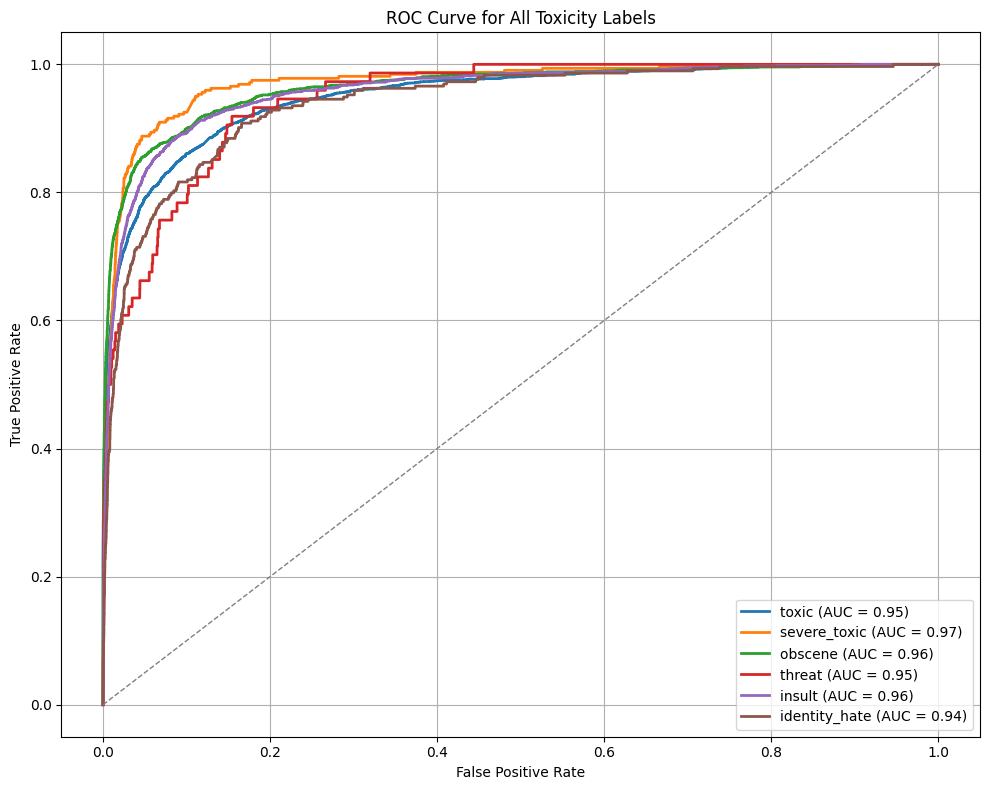

In [111]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'train_data' is loaded with 'comment_text' and the labels (toxic, severe_toxic, etc.)
# Apply preprocessing to 'comment_text' column
train_data['comment_text'] = train_data['comment_text'].apply(preprocess_text)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data['comment_text'], train_data[labels], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Initialize Naive Bayes model
nb_model = MultinomialNB()

# Initialize a dictionary to store ROC AUC results for each label
fpr = {}
tpr = {}
roc_auc = {}

# Train and evaluate a separate model for each label
for label in labels:
    # Train a binary classifier for each label
    nb_model.fit(X_train_tfidf, y_train[label])

    # Get predicted probabilities for each class
    predictions_proba = nb_model.predict_proba(X_val_tfidf)[:, 1]  # For binary classification (class 1)

    # Calculate ROC curve and AUC for each label
    fpr[label], tpr[label], _ = roc_curve(y_val[label], predictions_proba)
    roc_auc[label] = auc(fpr[label], tpr[label])

# Plot all ROC curves in a single graph
plt.figure(figsize=(10, 8))

# Plot the ROC curve for each label
for label in labels:
    plt.plot(fpr[label], tpr[label], lw=2, label=f'{label} (AUC = {roc_auc[label]:.2f})')

# Plot diagonal line (no discrimination)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=1)

# Customize the plot
plt.title('ROC Curve for All Toxicity Labels')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


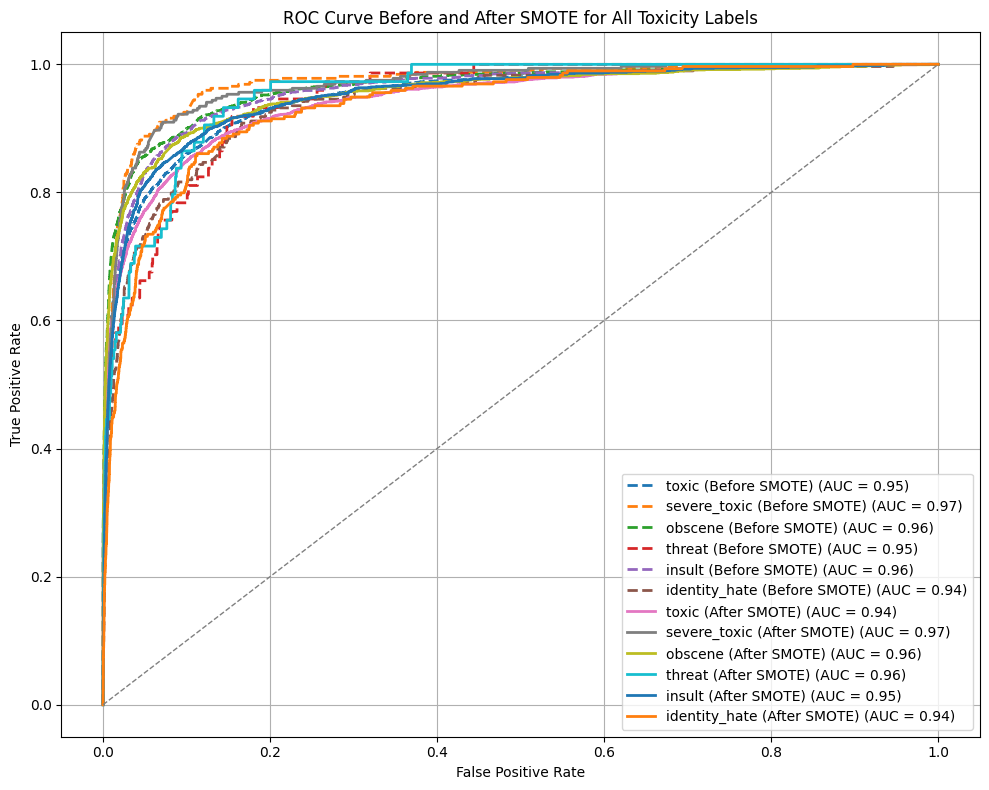

In [112]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
import numpy as np

# Assuming 'train_data' is loaded with 'comment_text' and the labels (toxic, severe_toxic, etc.)
# Apply preprocessing to 'comment_text' column
train_data['comment_text'] = train_data['comment_text'].apply(preprocess_text)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data['comment_text'], train_data[labels], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Initialize Naive Bayes model
nb_model = MultinomialNB()

# Initialize dictionaries to store ROC AUC results for each label (before and after SMOTE)
fpr_before = {}
tpr_before = {}
roc_auc_before = {}
fpr_after = {}
tpr_after = {}
roc_auc_after = {}

# Train the model and calculate ROC AUC (before SMOTE)
for label in labels:
    nb_model.fit(X_train_tfidf, y_train[label])
    predictions_proba = nb_model.predict_proba(X_val_tfidf)[:, 1]  # Get probabilities for class 1
    fpr_before[label], tpr_before[label], _ = roc_curve(y_val[label], predictions_proba)
    roc_auc_before[label] = auc(fpr_before[label], tpr_before[label])

# Apply SMOTE for each label separately
smote = SMOTE(random_state=42)

# For each label, apply SMOTE independently
fpr_after = {}
tpr_after = {}
roc_auc_after = {}

# Apply SMOTE to each label one by one
for label in labels:
    # Apply SMOTE to oversample the minority class for this particular label
    X_resampled, y_resampled = smote.fit_resample(X_train_tfidf, y_train[label])  # Apply to label's data only

    # Retrain the model with the resampled dataset
    nb_model.fit(X_resampled, y_resampled)

    # Calculate the ROC curve and AUC for the current label
    predictions_proba = nb_model.predict_proba(X_val_tfidf)[:, 1]
    fpr_after[label], tpr_after[label], _ = roc_curve(y_val[label], predictions_proba)
    roc_auc_after[label] = auc(fpr_after[label], tpr_after[label])

# Plot ROC curves for before and after SMOTE on a single graph
plt.figure(figsize=(10, 8))

# Plot ROC curves before SMOTE
for label in labels:
    plt.plot(fpr_before[label], tpr_before[label], lw=2, label=f'{label} (Before SMOTE) (AUC = {roc_auc_before[label]:.2f})', linestyle='--')

# Plot ROC curves after SMOTE
for label in labels:
    plt.plot(fpr_after[label], tpr_after[label], lw=2, label=f'{label} (After SMOTE) (AUC = {roc_auc_after[label]:.2f})')

# Plot diagonal line (no discrimination)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=1)

# Customize the plot
plt.title('ROC Curve Before and After SMOTE for All Toxicity Labels')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


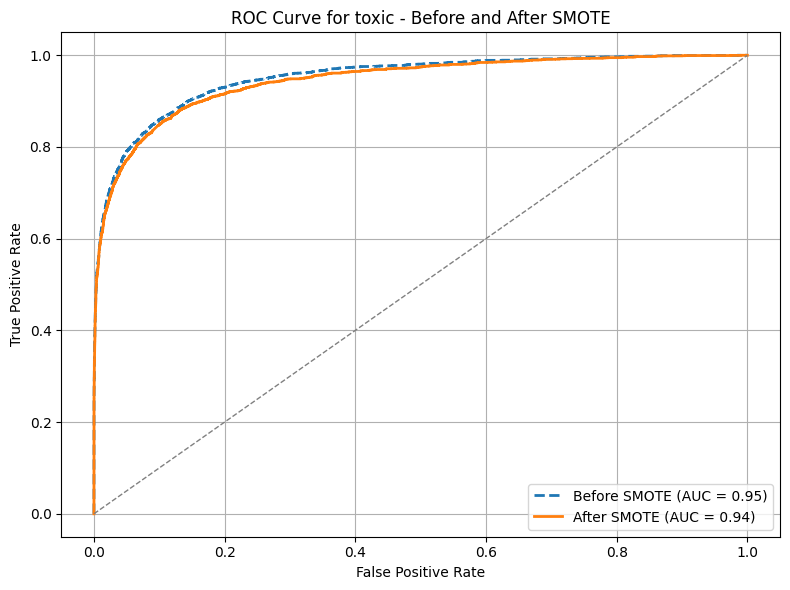

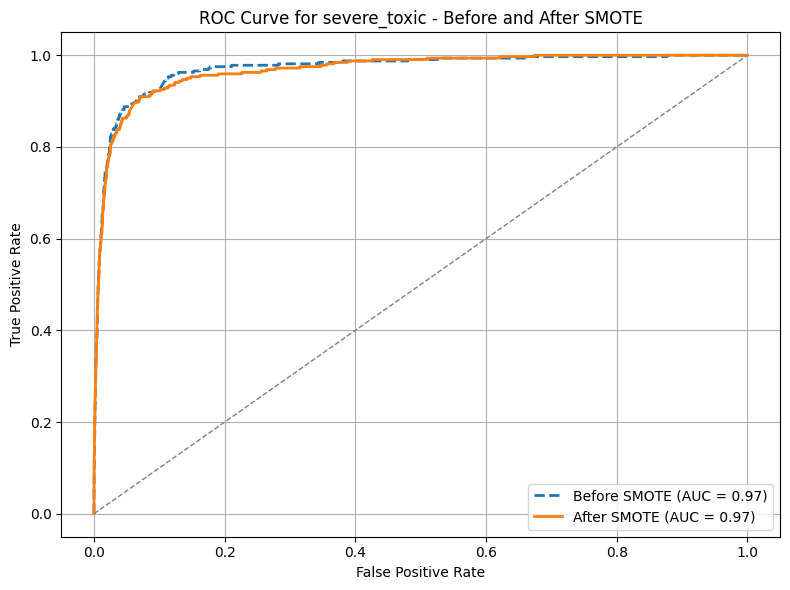

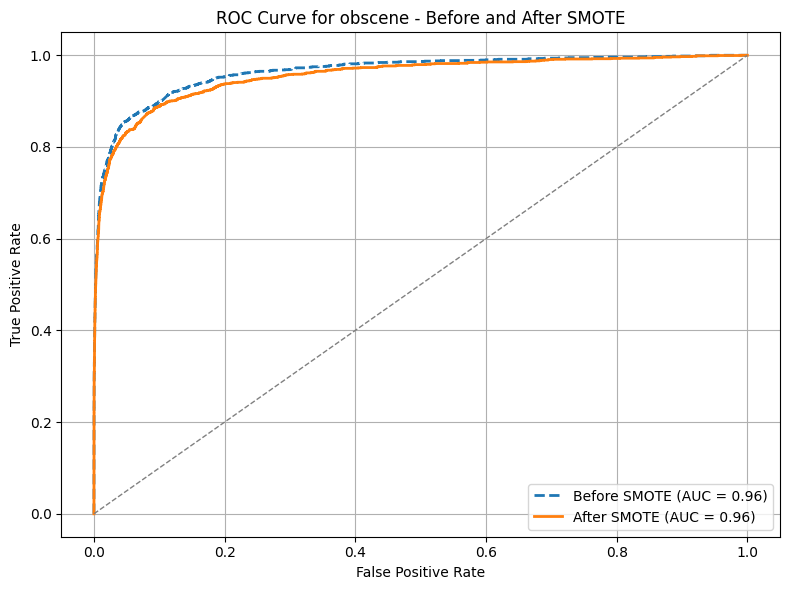

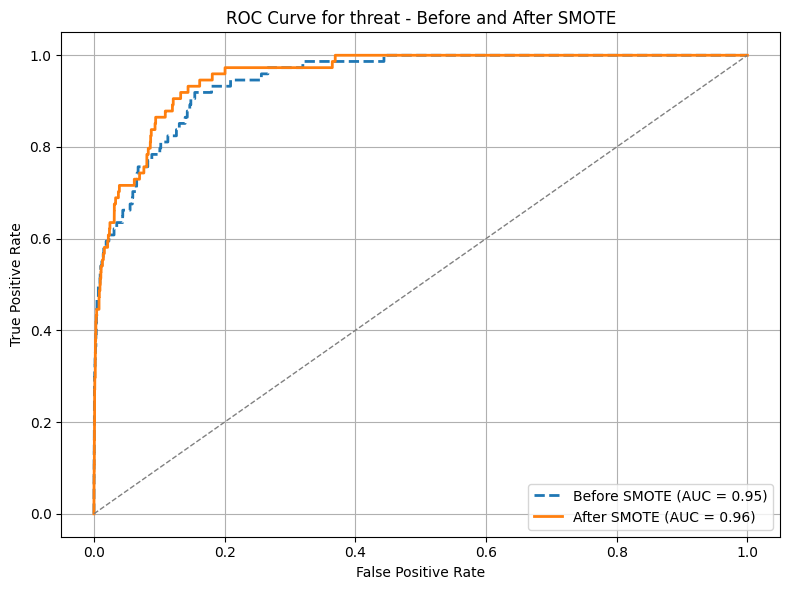

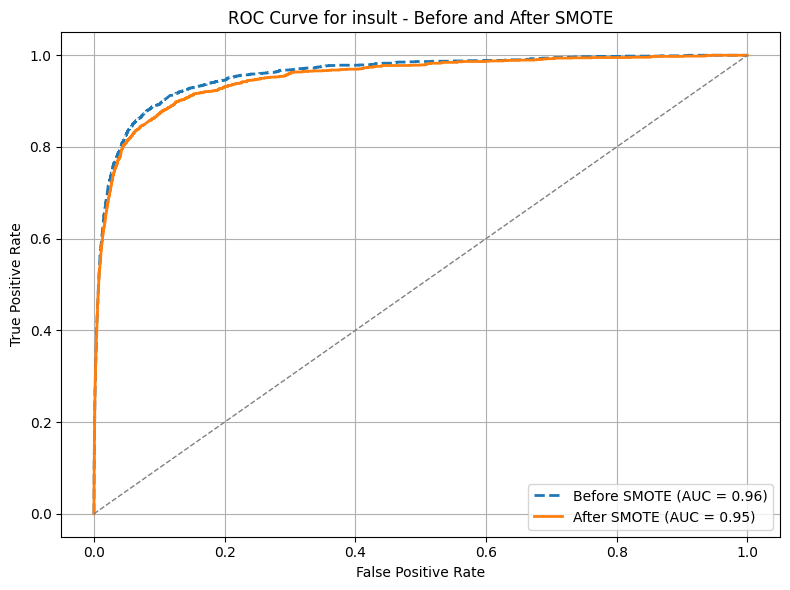

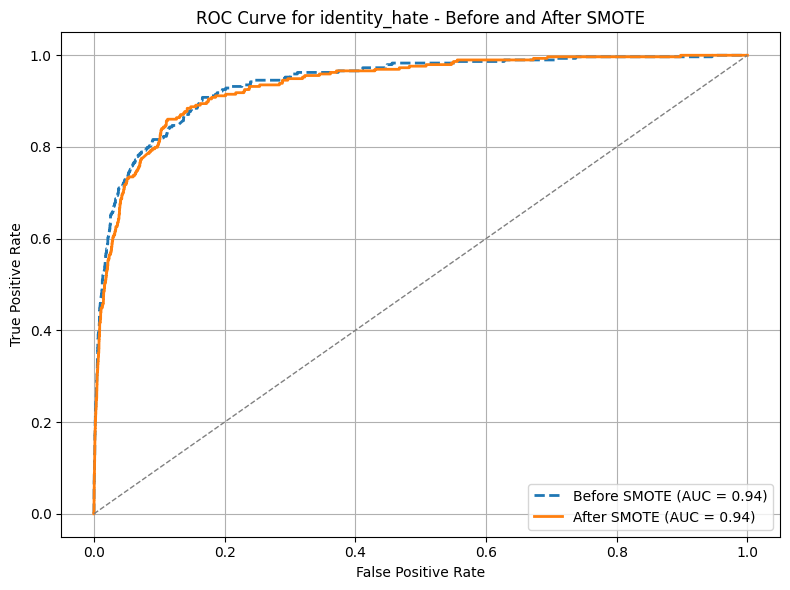

In [113]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
import numpy as np

# Assuming 'train_data' is loaded with 'comment_text' and the labels (toxic, severe_toxic, etc.)
# Apply preprocessing to 'comment_text' column
train_data['comment_text'] = train_data['comment_text'].apply(preprocess_text)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data['comment_text'], train_data[labels], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Initialize Naive Bayes model
nb_model = MultinomialNB()

# Initialize dictionaries to store ROC AUC results for each label (before and after SMOTE)
fpr_before = {}
tpr_before = {}
roc_auc_before = {}
fpr_after = {}
tpr_after = {}
roc_auc_after = {}

# Train the model and calculate ROC AUC (before SMOTE)
for label in labels:
    nb_model.fit(X_train_tfidf, y_train[label])
    predictions_proba = nb_model.predict_proba(X_val_tfidf)[:, 1]  # Get probabilities for class 1
    fpr_before[label], tpr_before[label], _ = roc_curve(y_val[label], predictions_proba)
    roc_auc_before[label] = auc(fpr_before[label], tpr_before[label])

# Apply SMOTE for each label separately
smote = SMOTE(random_state=42)

# For each label, apply SMOTE independently
fpr_after = {}
tpr_after = {}
roc_auc_after = {}

# Apply SMOTE to each label one by one
for label in labels:
    # Apply SMOTE to oversample the minority class for this particular label
    X_resampled, y_resampled = smote.fit_resample(X_train_tfidf, y_train[label])  # Apply to label's data only

    # Retrain the model with the resampled dataset
    nb_model.fit(X_resampled, y_resampled)

    # Calculate the ROC curve and AUC for the current label
    predictions_proba = nb_model.predict_proba(X_val_tfidf)[:, 1]
    fpr_after[label], tpr_after[label], _ = roc_curve(y_val[label], predictions_proba)
    roc_auc_after[label] = auc(fpr_after[label], tpr_after[label])

# Plot ROC curves for each label (before and after SMOTE) on separate plots
for label in labels:
    plt.figure(figsize=(8, 6))

    # Plot ROC curve before SMOTE
    plt.plot(fpr_before[label], tpr_before[label], lw=2, label=f'Before SMOTE (AUC = {roc_auc_before[label]:.2f})', linestyle='--')

    # Plot ROC curve after SMOTE
    plt.plot(fpr_after[label], tpr_after[label], lw=2, label=f'After SMOTE (AUC = {roc_auc_after[label]:.2f})')

    # Plot diagonal line (no discrimination)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=1)

    # Customize the plot
    plt.title(f'ROC Curve for {label} - Before and After SMOTE')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


<ipython-input-114-680b28f8306e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_distribution_before.index, y=label_distribution_before.values, palette="viridis")


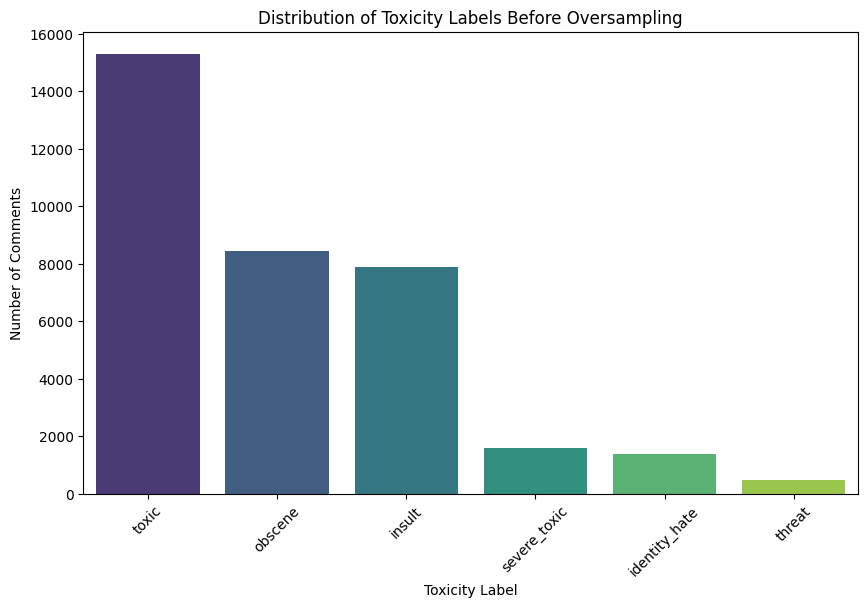

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of toxicity labels before SMOTE
label_distribution_before = train_data[labels].sum().sort_values(ascending=False)

# Plot the distribution of toxicity labels before oversampling
plt.figure(figsize=(10, 6))
sns.barplot(x=label_distribution_before.index, y=label_distribution_before.values, palette="viridis")
plt.title('Distribution of Toxicity Labels Before Oversampling')
plt.ylabel('Number of Comments')
plt.xlabel('Toxicity Label')
plt.xticks(rotation=45)
plt.show()


In [115]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE for oversampling the minority classes
smote = SMOTE(random_state=42)
X_train_smote = {}
y_train_smote = {}

for label in labels:
    X_train_smote[label], y_train_smote[label] = smote.fit_resample(X_train_tfidf, y_train[label])


<ipython-input-116-1819eb05f0b9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(smote_counts.keys()), y=list(smote_counts.values()), palette="viridis")


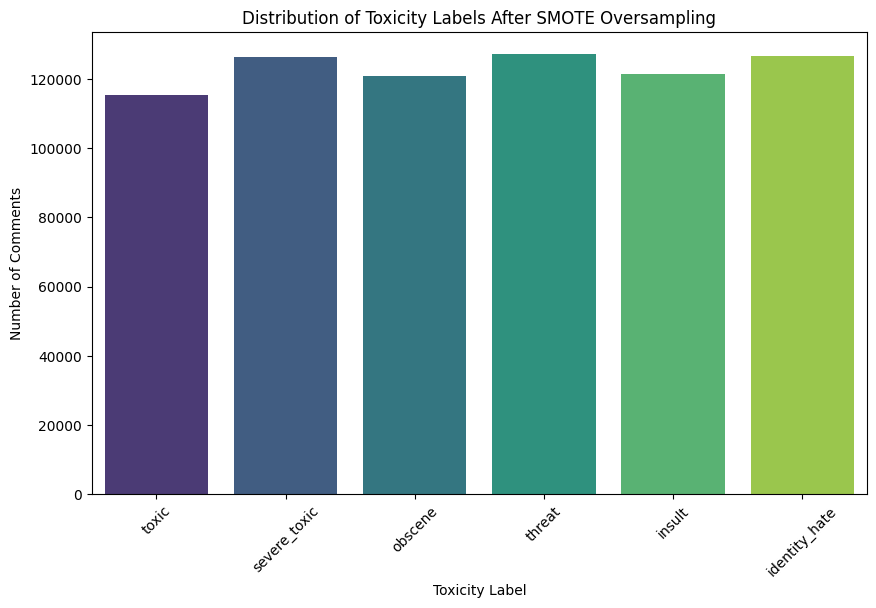

In [116]:
# Distribution of labels after SMOTE
smote_counts = {label: sum(y_train_smote[label]) for label in labels}

# Plot the distribution after SMOTE
plt.figure(figsize=(10, 6))
sns.barplot(x=list(smote_counts.keys()), y=list(smote_counts.values()), palette="viridis")
plt.title('Distribution of Toxicity Labels After SMOTE Oversampling')
plt.ylabel('Number of Comments')
plt.xlabel('Toxicity Label')
plt.xticks(rotation=45)
plt.show()


<ipython-input-117-6c2fda8f38af>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_data[label], palette="viridis")
<ipython-input-117-6c2fda8f38af>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_data[label], palette="viridis")
<ipython-input-117-6c2fda8f38af>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_data[label], palette="viridis")
<ipython-input-117-6c2fda8f38af>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` a

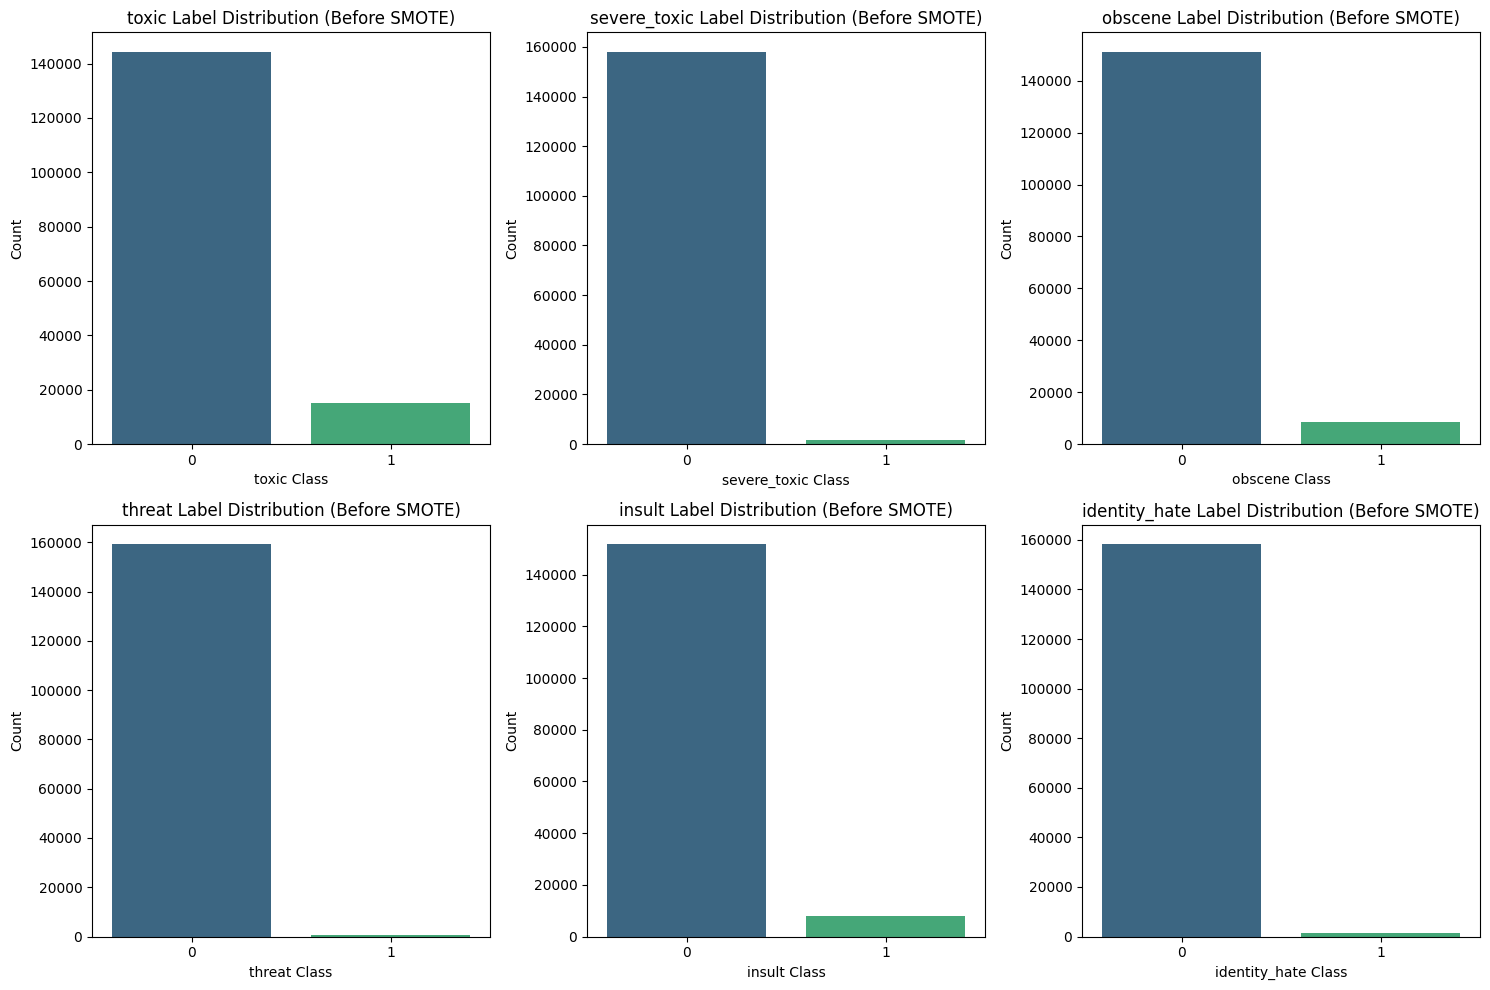

In [117]:
# Plot the binary label distribution for each class before SMOTE
plt.figure(figsize=(15, 10))

for i, label in enumerate(labels):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=train_data[label], palette="viridis")
    plt.title(f'{label} Label Distribution (Before SMOTE)')
    plt.xlabel(f'{label} Class')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


<ipython-input-118-f097e705d4eb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=smote_counts.index, y=smote_counts.values, palette="viridis")
<ipython-input-118-f097e705d4eb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=smote_counts.index, y=smote_counts.values, palette="viridis")
<ipython-input-118-f097e705d4eb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=smote_counts.index, y=smote_counts.values, palette="viridis")
<ipython-input-118-f097e705d4eb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated 

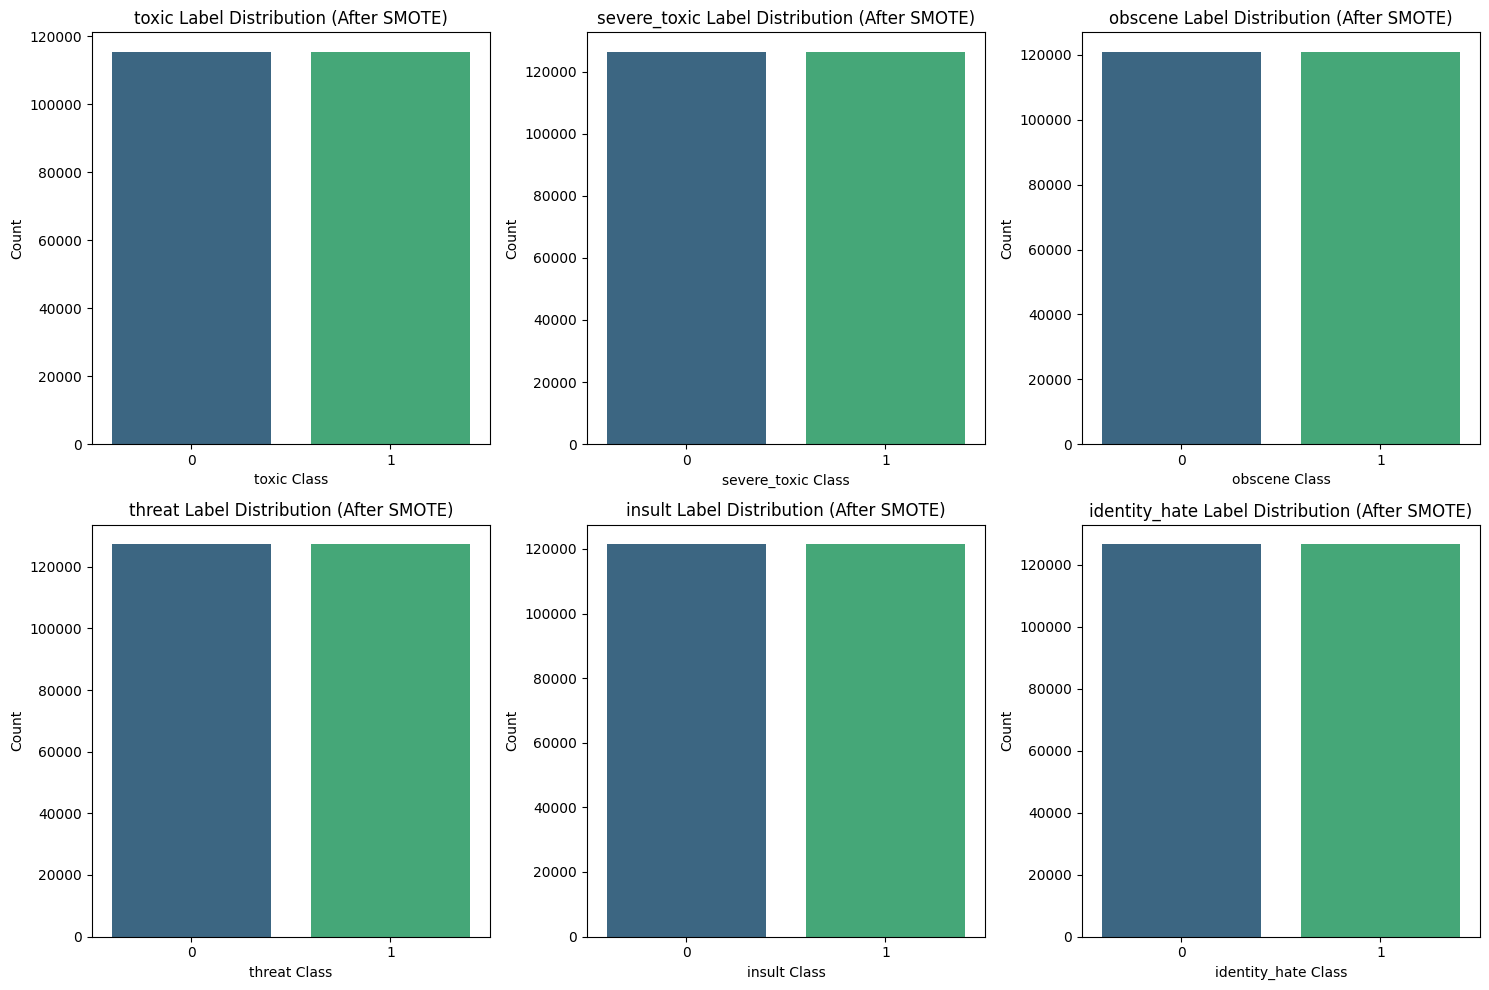

In [118]:
# Plot the binary label distribution for each class after SMOTE
plt.figure(figsize=(15, 10))

for i, label in enumerate(labels):
    plt.subplot(2, 3, i+1)
    # Count the number of "0" and "1" after SMOTE
    smote_counts = pd.Series(y_train_smote[label]).value_counts()

    sns.barplot(x=smote_counts.index, y=smote_counts.values, palette="viridis")
    plt.title(f'{label} Label Distribution (After SMOTE)')
    plt.xlabel(f'{label} Class')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


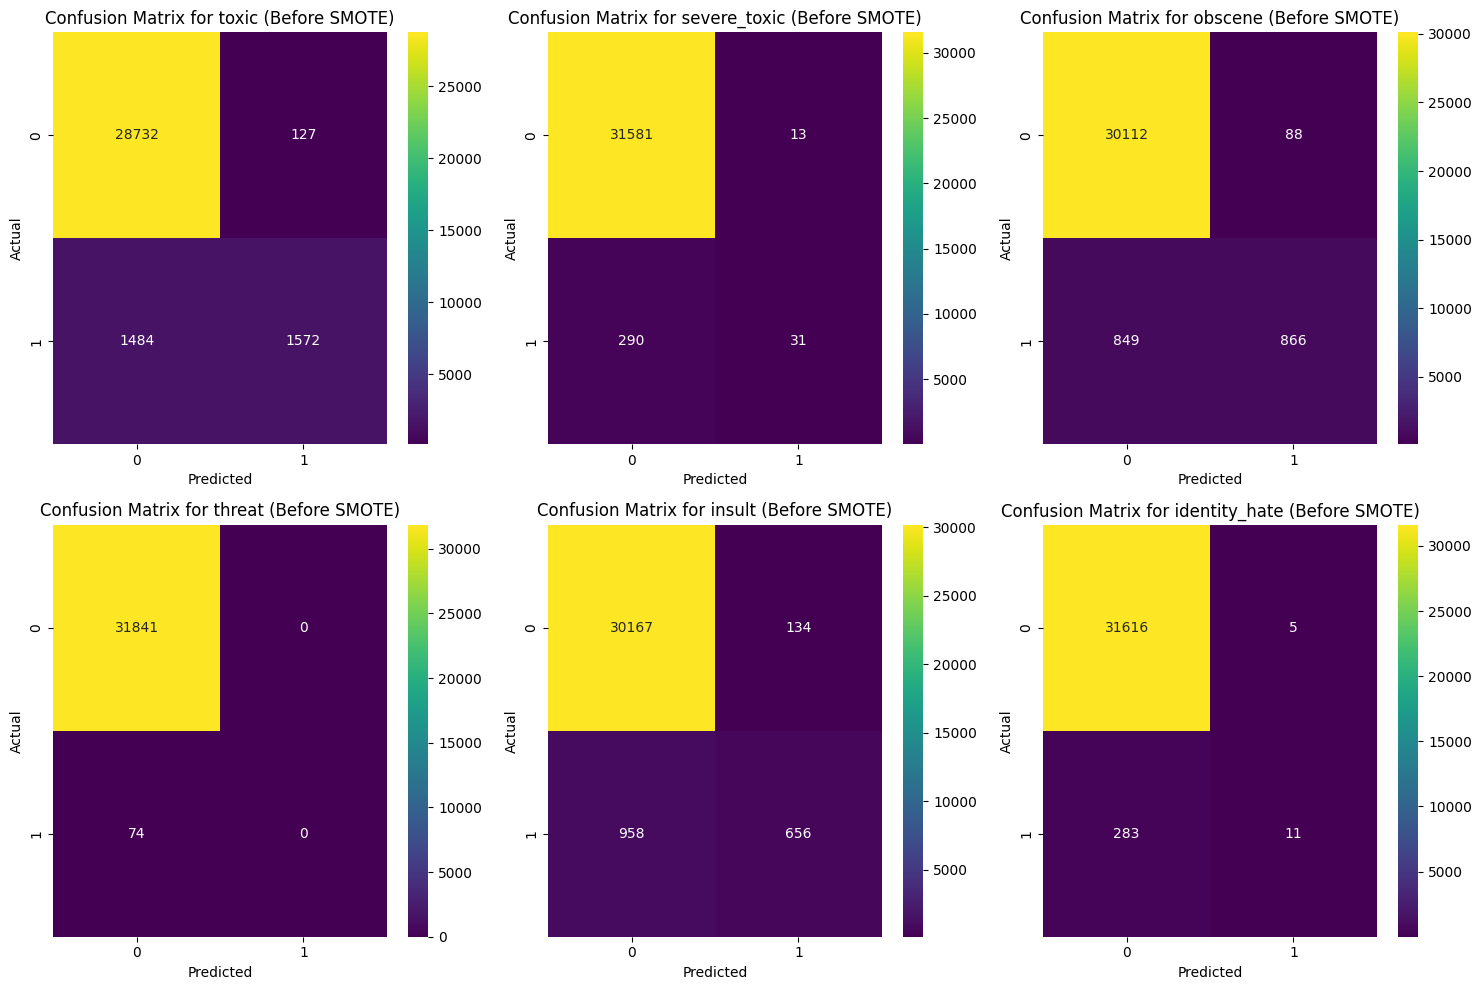

In [119]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix for each toxicity class (before SMOTE)
plt.figure(figsize=(15, 10))

for i, label in enumerate(labels):
    plt.subplot(2, 3, i+1)
    # Compute the confusion matrix
    cm = confusion_matrix(y_val[label], predictions[label])

    # Plot the confusion matrix using a heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
    plt.title(f'Confusion Matrix for {label} (Before SMOTE)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


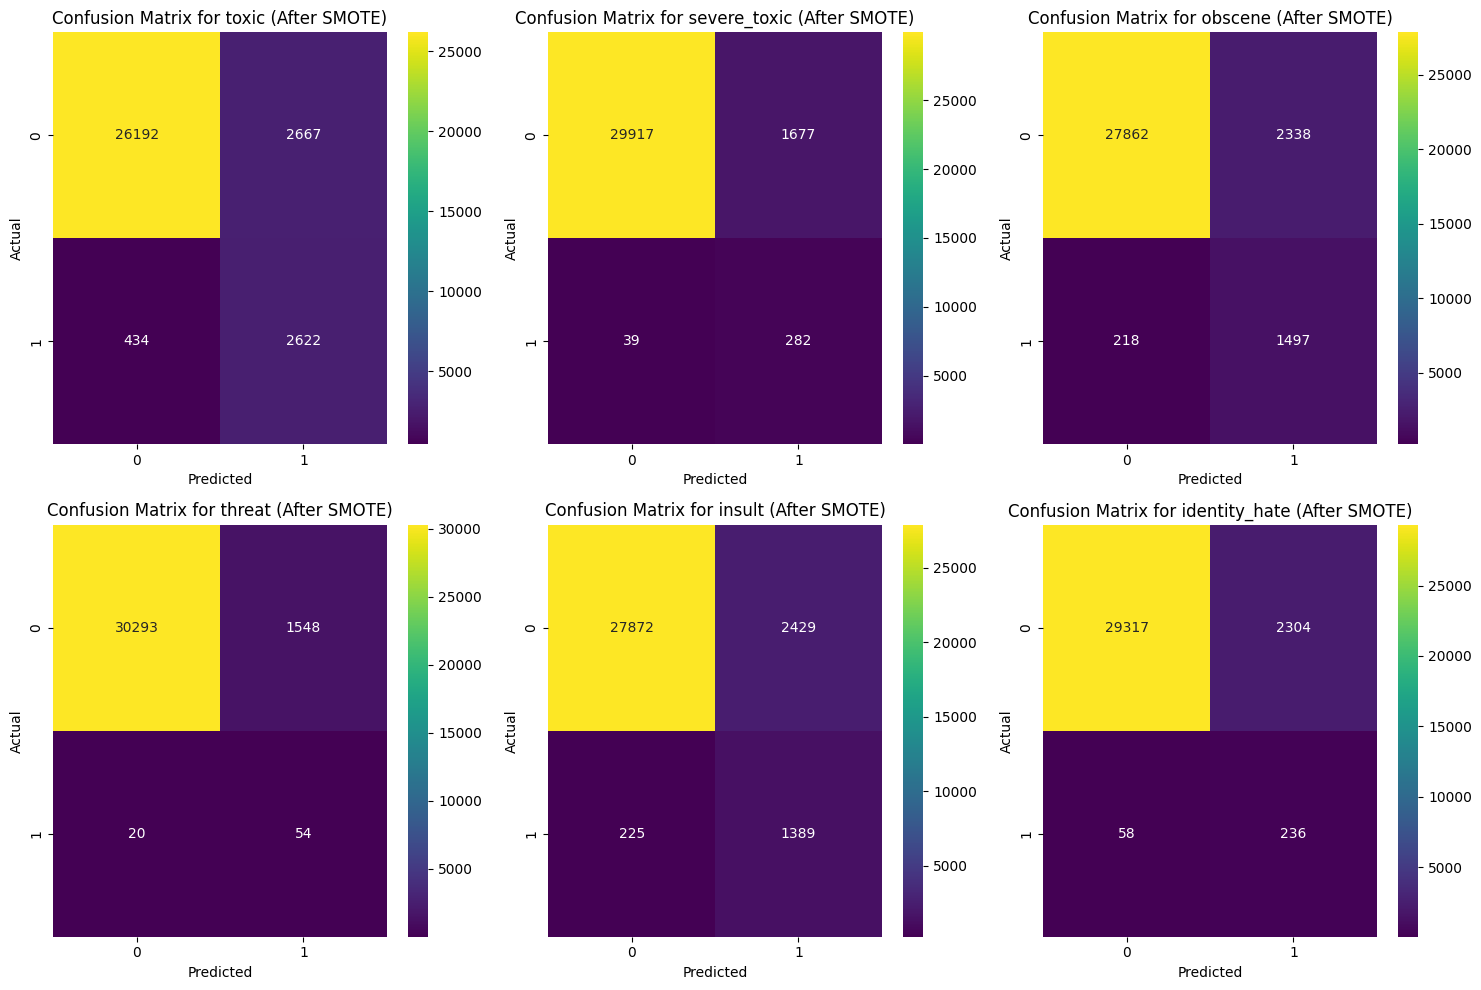

In [120]:
# Plot the confusion matrix for each toxicity class (after SMOTE)
plt.figure(figsize=(15, 10))

for i, label in enumerate(labels):
    plt.subplot(2, 3, i+1)
    # Compute the confusion matrix
    cm_smote = confusion_matrix(y_val[label], predictions_smote[label])

    # Plot the confusion matrix using a heatmap
    sns.heatmap(cm_smote, annot=True, fmt='d', cmap='viridis')
    plt.title(f'Confusion Matrix for {label} (After SMOTE)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


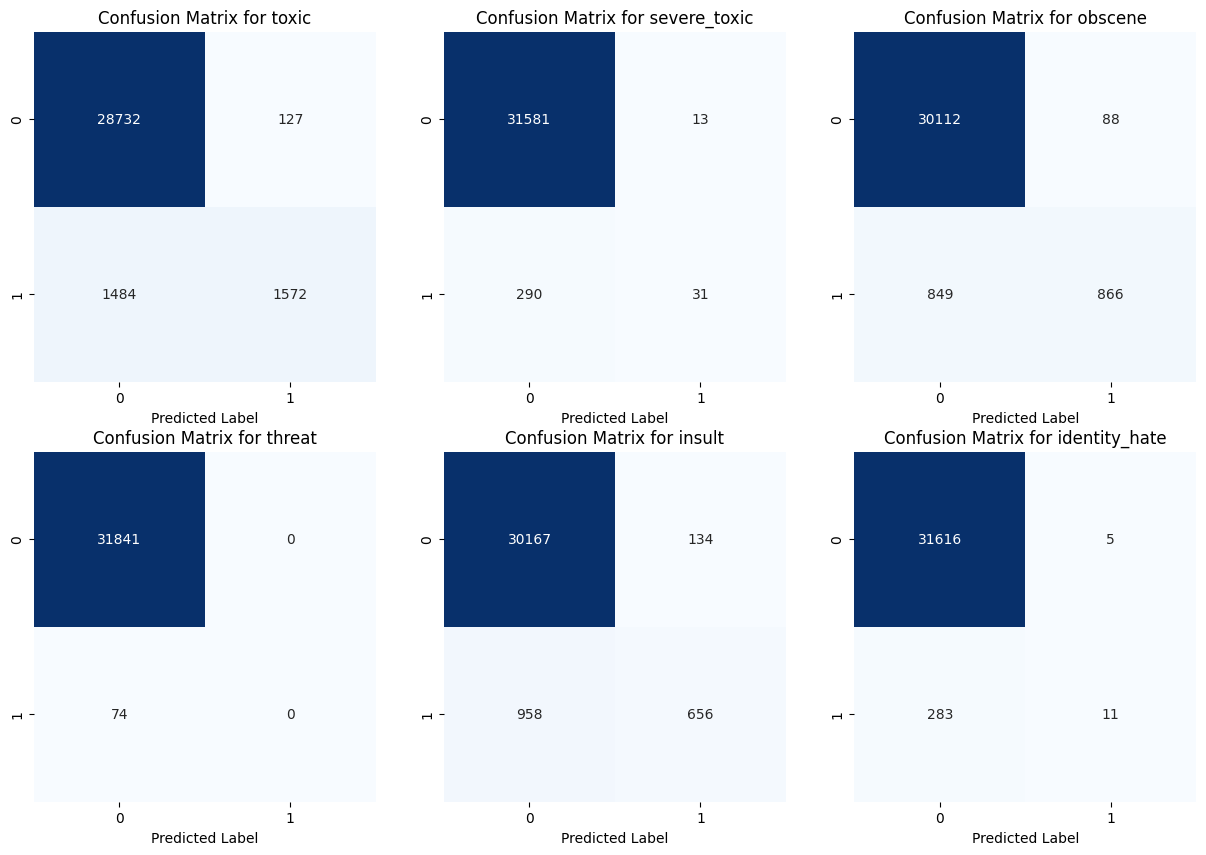

In [121]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix for each class
plt.figure(figsize=(15, 10))

for i, label in enumerate(labels):
    plt.subplot(2, 3, i+1)
    # Compute the confusion matrix for the label
    cm = confusion_matrix(y_val[label], predictions[label])

    # Plot the confusion matrix using a heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {label}')
    plt.xlabel('Predicted Label')



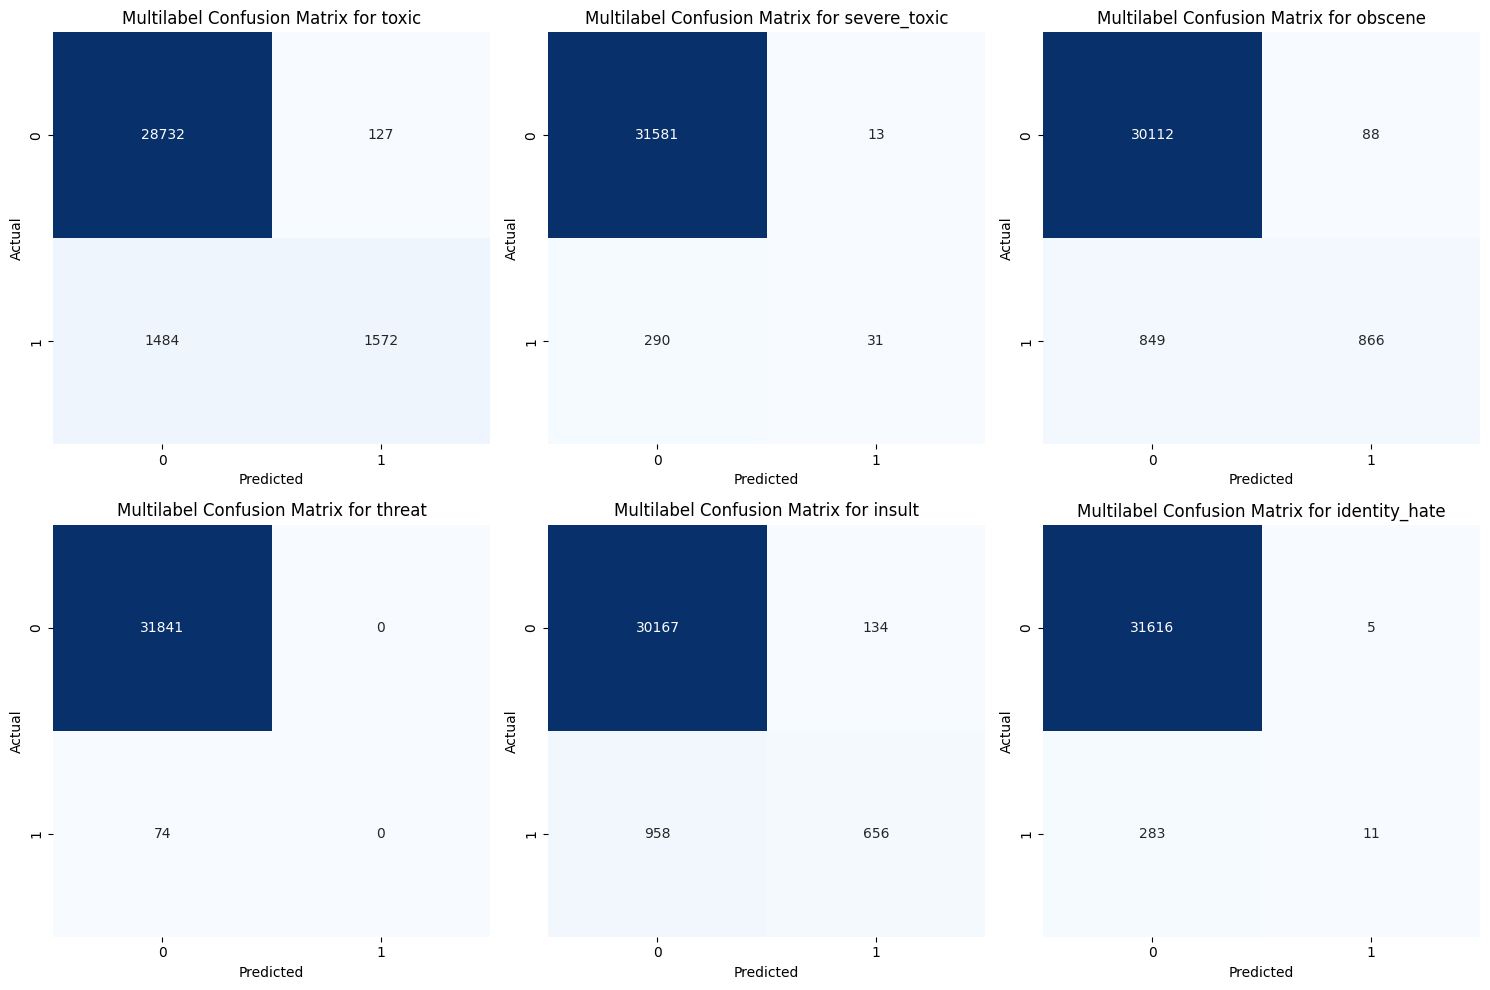

In [122]:
from sklearn.metrics import multilabel_confusion_matrix

# Generate multilabel confusion matrices for all six classes combined
mlb_conf_matrix = multilabel_confusion_matrix(y_val, pd.DataFrame(predictions))

# Plot the multilabel confusion matrix for all six labels combined
plt.figure(figsize=(15, 10))

for i, label in enumerate(labels):
    plt.subplot(2, 3, i+1)
    sns.heatmap(mlb_conf_matrix[i], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Multilabel Confusion Matrix for {label}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


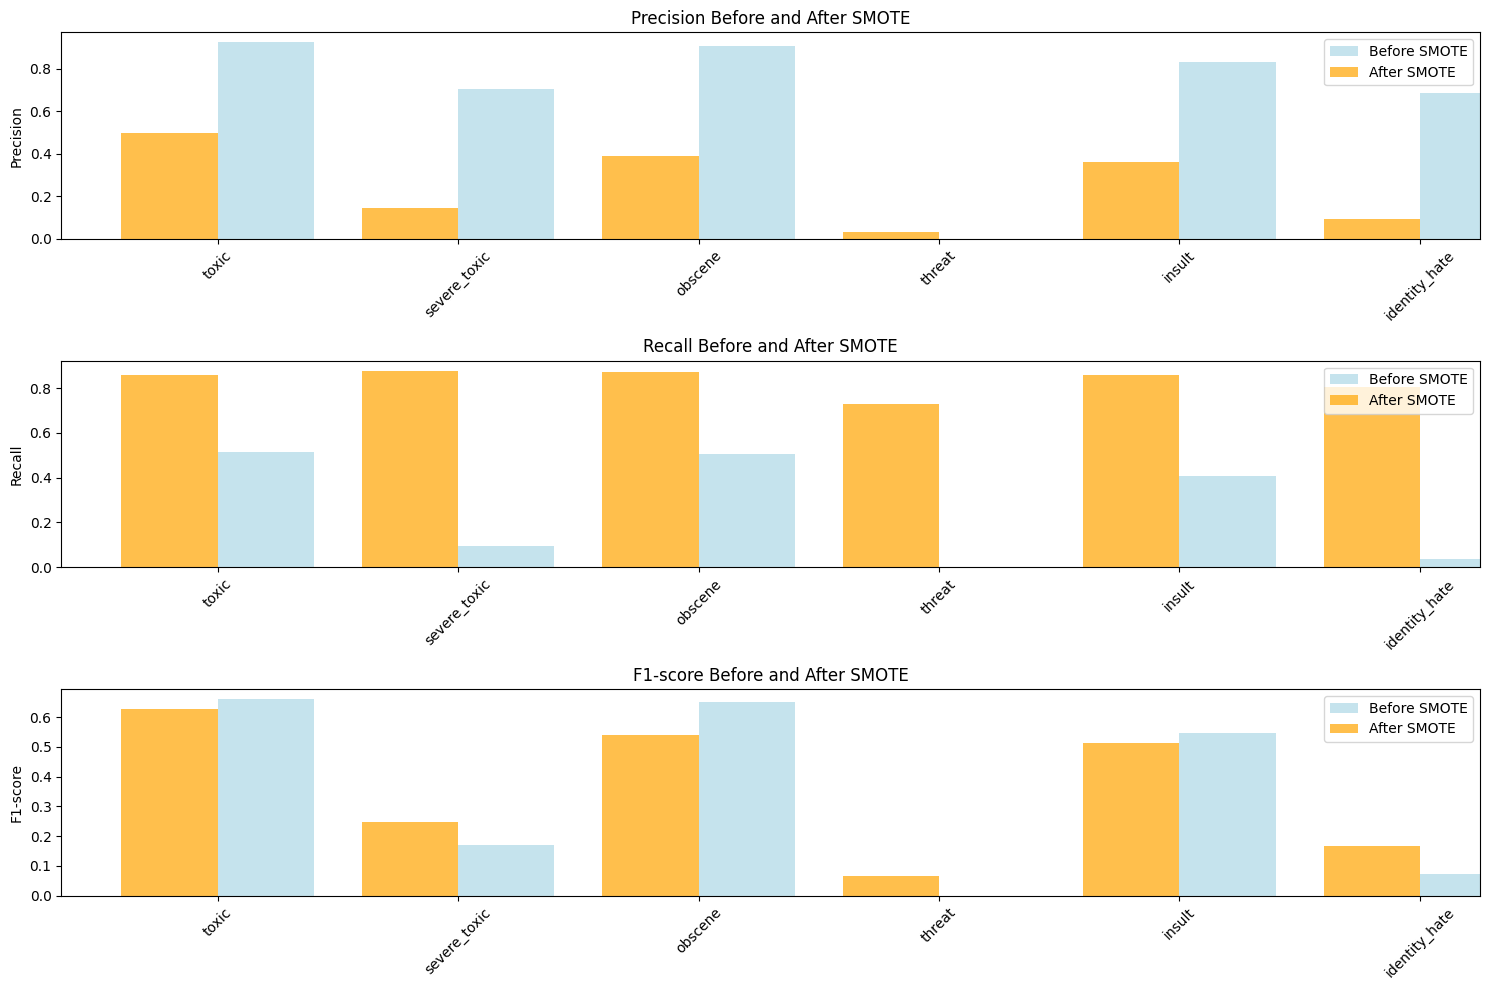

In [123]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Store metrics before and after SMOTE
metrics_before = {'Precision': [], 'Recall': [], 'F1-score': []}
metrics_after = {'Precision': [], 'Recall': [], 'F1-score': []}

# Compute metrics before SMOTE for each label
for label in labels:
    precision_before = precision_score(y_val[label], predictions[label])
    recall_before = recall_score(y_val[label], predictions[label])
    f1_before = f1_score(y_val[label], predictions[label])

    metrics_before['Precision'].append(precision_before)
    metrics_before['Recall'].append(recall_before)
    metrics_before['F1-score'].append(f1_before)

# Compute metrics after SMOTE for each label
for label in labels:
    precision_after = precision_score(y_val[label], predictions_smote[label])
    recall_after = recall_score(y_val[label], predictions_smote[label])
    f1_after = f1_score(y_val[label], predictions_smote[label])

    metrics_after['Precision'].append(precision_after)
    metrics_after['Recall'].append(recall_after)
    metrics_after['F1-score'].append(f1_after)

# Convert metrics into DataFrames for easier plotting
metrics_df_before = pd.DataFrame(metrics_before, index=labels)
metrics_df_after = pd.DataFrame(metrics_after, index=labels)

# Plot Precision, Recall, and F1-score Before and After SMOTE
plt.figure(figsize=(15, 10))

for i, metric in enumerate(['Precision', 'Recall', 'F1-score']):
    plt.subplot(3, 1, i+1)

    # Plot Before and After side by side
    metrics_df_before[metric].plot(kind='bar', color='lightblue', alpha=0.7, label='Before SMOTE', position=0, width=0.4)
    metrics_df_after[metric].plot(kind='bar', color='orange', alpha=0.7, label='After SMOTE', position=1, width=0.4)

    plt.title(f'{metric} Before and After SMOTE')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend()

plt.tight_layout()
plt.show()


In [124]:
import pandas as pd

# Assuming `test_data` is loaded from test.csv and `nb_model` is the final trained Naive Bayes model
# Assuming labels is a list of all target column names: ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Load test data
test_data = pd.read_csv('/content/test.csv')  # Adjust path if needed

# Preprocess the test data 'comment_text'
test_data['comment_text'] = test_data['comment_text'].apply(preprocess_text)

# Vectorize the test data using the same TF-IDF vectorizer used for training
X_test_tfidf = vectorizer.transform(test_data['comment_text'])

# Prepare the submission dataframe
submission_columns = ['id', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
submission = pd.DataFrame(columns=submission_columns)

# Adding the 'id' to the submission DataFrame
submission['id'] = test_data['id']

# Loop through each label to make predictions and fill in the submission DataFrame
for label in labels:
    # Get binary predictions (0 or 1) for the label
    y_pred = nb_model.predict(X_test_tfidf)

    # Add the predictions to the submission DataFrame
    submission[label] = y_pred

# Save the submission file
submission.to_csv('submission.csv', index=False)
print(submission)


                      id  toxic  severe_toxic  obscene  threat  insult  \
0       00001cee341fdb12      1             1        1       1       1   
1       0000247867823ef7      0             0        0       0       0   
2       00013b17ad220c46      0             0        0       0       0   
3       00017563c3f7919a      0             0        0       0       0   
4       00017695ad8997eb      0             0        0       0       0   
...                  ...    ...           ...      ...     ...     ...   
153159  fffcd0960ee309b5      0             0        0       0       0   
153160  fffd7a9a6eb32c16      1             1        1       1       1   
153161  fffda9e8d6fafa9e      0             0        0       0       0   
153162  fffe8f1340a79fc2      0             0        0       0       0   
153163  ffffce3fb183ee80      1             1        1       1       1   

        identity_hate  
0                   1  
1                   0  
2                   0  
3              

In [147]:
import pandas as pd
from sklearn.metrics import roc_auc_score

# Assuming `test_data` is loaded from test.csv and `nb_model` is the final trained Naive Bayes model
# Assuming `vectorizer` is the same TF-IDF vectorizer used during training
# Labels are: ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Load test data
test_data = pd.read_csv('/content/test.csv')  # Adjust path if needed

# Preprocess the test data 'comment_text' (the same preprocessing used in training)
test_data['comment_text'] = test_data['comment_text'].apply(preprocess_text)

# Vectorize the test data using the same TF-IDF vectorizer used for training
X_test_tfidf = vectorizer.transform(test_data['comment_text'])

# Prepare the submission dataframe
submission_columns = ['id', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
submission = pd.DataFrame(columns=submission_columns)

# Adding the 'id' to the submission DataFrame
submission['id'] = test_data['id']

# Loop through each label to make predictions for ROC AUC and populate the submission dataframe
for label in submission_columns[1:]:  # Skipping 'id' column
    # Get probabilities for each label (class 1 probability)
    y_pred_proba = nb_model.predict_proba(X_test_tfidf)[:, 1]

    # Add the predicted probabilities to the submission DataFrame (as binary labels)
    submission[label] = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to 0 or 1

    # Calculate ROC AUC score for the label (I need true labels for this, but assuming test labels are available)
    # Since we don't have true labels for the test set in my case, we skip calculating the ROC AUC for test data here.
    # can calculate ROC AUC only when true labels are available for evaluation (i.e., on a validation set or after submission).

# Save the submission file
submission.to_csv('submissionroc.csv', index=False)

# Print a message to confirm submission file creation
print("Submission file has been created: submissionroc.csv")


Submission file has been created: submissionroc.csv


#Cross Validation

In [168]:
train_data = train_data[:X_train_tfidf.shape[0]]  # Trim train_data to match the number of rows in X_train_tfidf
train_data = train_data.reset_index(drop=True)  # Reset indices
X_train_tfidf = X_train_tfidf[:len(train_data)]  # Ensure both are the same length


In [169]:
print(f"Missing data in combined_toxic: {train_data['combined_toxic'].isnull().sum()}")


Missing data in combined_toxic: 0


In [170]:
# Reset the indices and ensure both datasets have the same length
train_data = train_data.reset_index(drop=True)
X_train_tfidf = X_train_tfidf[:len(train_data)]  # Ensure both are the same length

# proceed with cross-validation


In [171]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

# Define the number of splits for cross-validation
k_folds = 5

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Store metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Loop over each fold
for train_index, val_index in skf.split(X_train_tfidf, train_data['combined_toxic']):
    # Split data into train and validation sets
    X_train_fold, X_val_fold = X_train_tfidf[train_index], X_train_tfidf[val_index]
    y_train_fold, y_val_fold = train_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].iloc[train_index], \
                                train_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].iloc[val_index]

    # Initialize the Naive Bayes model and wrap it in a OneVsRestClassifier for multi-label classification
    model = OneVsRestClassifier(MultinomialNB())

    # Fit the model on training data
    model.fit(X_train_fold, y_train_fold)

    # Make predictions
    y_pred = model.predict(X_val_fold)
    y_pred_proba = model.predict_proba(X_val_fold)  # For ROC AUC score

    # Calculate precision, recall, f1, and accuracy for each label
    precision, recall, f1, _ = precision_recall_fscore_support(y_val_fold, y_pred, average='macro')
    accuracy = accuracy_score(y_val_fold, y_pred)

    # Calculate ROC AUC for multi-label classification
    roc_auc = roc_auc_score(y_val_fold, y_pred_proba, average='macro', multi_class='ovr')

    # Append metrics for each fold
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)
    roc_auc_scores.append(roc_auc)

# Calculate average metrics across all folds
print(f"Average Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Average Precision: {np.mean(precision_scores):.4f}")
print(f"Average Recall: {np.mean(recall_scores):.4f}")
print(f"Average F1-Score: {np.mean(f1_scores):.4f}")
print(f"Average ROC AUC: {np.mean(roc_auc_scores):.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Average Accuracy: 0.8981
Average Precision: 0.0000
Average Recall: 0.0000
Average F1-Score: 0.0000
Average ROC AUC: 0.4990


In [148]:
print(f"Shape of X_train_tfidf: {X_train_tfidf.shape[0]}")
print(f"Length of train_data['combined_toxic']: {len(train_data['combined_toxic'])}")


Shape of X_train_tfidf: 127656
Length of train_data['combined_toxic']: 127656


In [157]:
print(f"Shape of y_val_fold: {y_val_fold.shape}")
print(f"Shape of y_pred_proba: {y_pred_proba.shape}")
# Ensure y_val_fold is 1D
y_val_fold = y_val_fold.squeeze()
print(f"Shape of y_val_fold after squeeze: {y_val_fold.shape}")
# For binary classification, use only the second column of the probability array (positive class probabilities)
roc_auc = roc_auc_score(y_val_fold, y_pred_proba[:, 1])




Shape of y_val_fold: (25532,)
Shape of y_pred_proba: (25532, 2)
Shape of y_val_fold after squeeze: (25532,)


With XGboost model validation

In [172]:
# Import necessary libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, accuracy_score
from xgboost import XGBClassifier  # Import the XGBoost model
import numpy as np

# Define the number of splits for cross-validation
k_folds = 5

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Store metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Loop over each fold
for train_index, val_index in skf.split(X_train_tfidf, train_data['combined_toxic']):
    # Split data into train and validation sets
    X_train_fold, X_val_fold = X_train_tfidf[train_index], X_train_tfidf[val_index]
    y_train_fold, y_val_fold = train_data['combined_toxic'].iloc[train_index], train_data['combined_toxic'].iloc[val_index]

    # Initialize the XGBoost model
    model = XGBClassifier()

    # Fit the model on training data
    model.fit(X_train_fold, y_train_fold)

    # Make predictions
    y_pred = model.predict(X_val_fold)
    y_pred_proba = model.predict_proba(X_val_fold)[:, 1]  # For ROC AUC (second column for positive class)

    # Calculate precision, recall, f1, and accuracy for each fold
    precision, recall, f1, _ = precision_recall_fscore_support(y_val_fold, y_pred, average='binary')
    accuracy = accuracy_score(y_val_fold, y_pred)

    # Calculate ROC AUC
    roc_auc = roc_auc_score(y_val_fold, y_pred_proba)

    # Append metrics for each fold
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)
    roc_auc_scores.append(roc_auc)

# Calculate average metrics across all folds
print(f"Average Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Average Precision: {np.mean(precision_scores):.4f}")
print(f"Average Recall: {np.mean(recall_scores):.4f}")
print(f"Average F1-Score: {np.mean(f1_scores):.4f}")
print(f"Average ROC AUC: {np.mean(roc_auc_scores):.4f}")


Average Accuracy: 0.8981
Average Precision: 0.0500
Average Recall: 0.0001
Average F1-Score: 0.0002
Average ROC AUC: 0.5020
